In [930]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [932]:
df = pd.read_csv('penguins.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [933]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


#### Let's start by checking the datatype that we have in our dataset:

In [935]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'culmen_length_mm' has 164 unique numerical items
Column 'culmen_depth_mm' has 80 unique numerical items
Column 'flipper_length_mm' has 57 unique numerical items
Column 'body_mass_g' has 94 unique numerical items
Column 'sex' has 3 unique categorical items


#### We can see that the sex column has 3 different values, let's explore them:

In [937]:
print(df['sex'].unique())

['MALE' 'FEMALE' nan '.']


#### We have an extra . value that we have to take care of and transform it into an actual NaN value:

In [939]:
df['sex'] = df['sex'].replace('.', np.nan)

In [940]:
print(df['sex'].unique())

['MALE' 'FEMALE' nan]


#### We can see that the majority of the columns present numerical values, except from the 'sex' one, that now presents categorical (male or female) values. We will take care of this column later, but first let's check if we have some missing values:

In [942]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'culmen_length_mm' has 2 missing values
Column 'culmen_depth_mm' has 2 missing values
Column 'flipper_length_mm' has 2 missing values
Column 'body_mass_g' has 2 missing values
Column 'sex' has 10 missing values


#### We have a few data points missing. We will take care of them by filling the nan values with the mean value (numerical columns) and the mode value (categorical columns):

In [944]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [945]:
original_df = df.copy()

In [946]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [947]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'culmen_length_mm' has 0 missing values
Column 'culmen_depth_mm' has 0 missing values
Column 'flipper_length_mm' has 0 missing values
Column 'body_mass_g' has 0 missing values
Column 'sex' has 0 missing values


#### We can see that we have no more missing values. Now we can check if we have some duplicated rows in the dataset. Let's put these values in a dataframe and delete them if they exist:

In [949]:
df[df.duplicated()]  # Putting the result into a new dataframe for clarity, there's no duplicated data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,43.92193,17.15117,214.01462,4201.754386,MALE


In [950]:
df.drop_duplicates(inplace = True)

In [951]:
df.nunique()

culmen_length_mm     165
culmen_depth_mm       81
flipper_length_mm     58
body_mass_g           95
sex                    2
dtype: int64

#### Now we can take care of the 'sex' colum and encode it:

In [953]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

#### Now the data is ready for the clustering model.

In [955]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.00000,3750.000000,1
1,39.50000,17.40000,186.00000,3800.000000,0
2,40.30000,18.00000,195.00000,3250.000000,0
3,43.92193,17.15117,214.01462,4201.754386,1
4,36.70000,19.30000,193.00000,3450.000000,0


## Exploratory Data Analysis

#### We can start doing a pairplot of our dataset:

<Figure size 800x550 with 0 Axes>

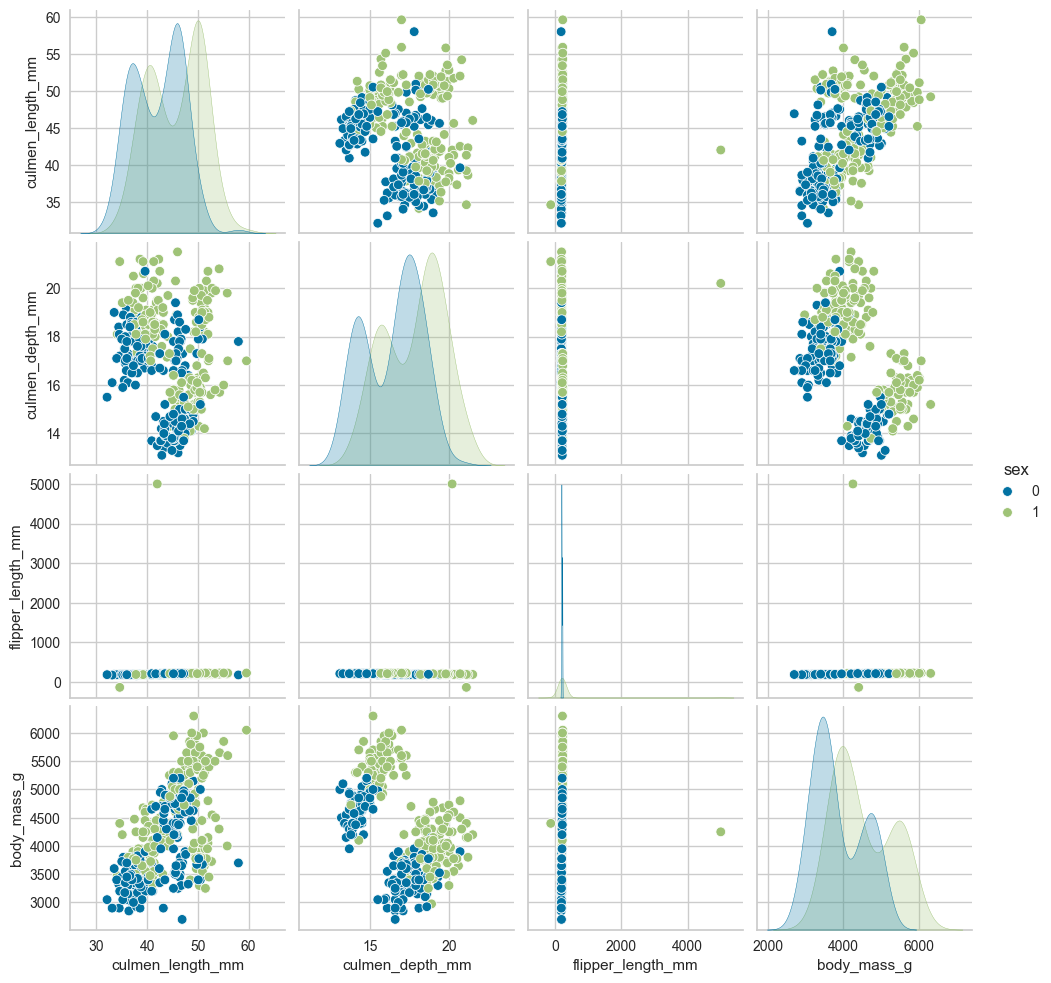

In [957]:
plt.figure()
sns.pairplot(df, hue= "sex")

#### We can clearly see some outliers in the flipper length column. So we will take care of them to avoid problems in the clustering process:

<Figure size 800x550 with 0 Axes>

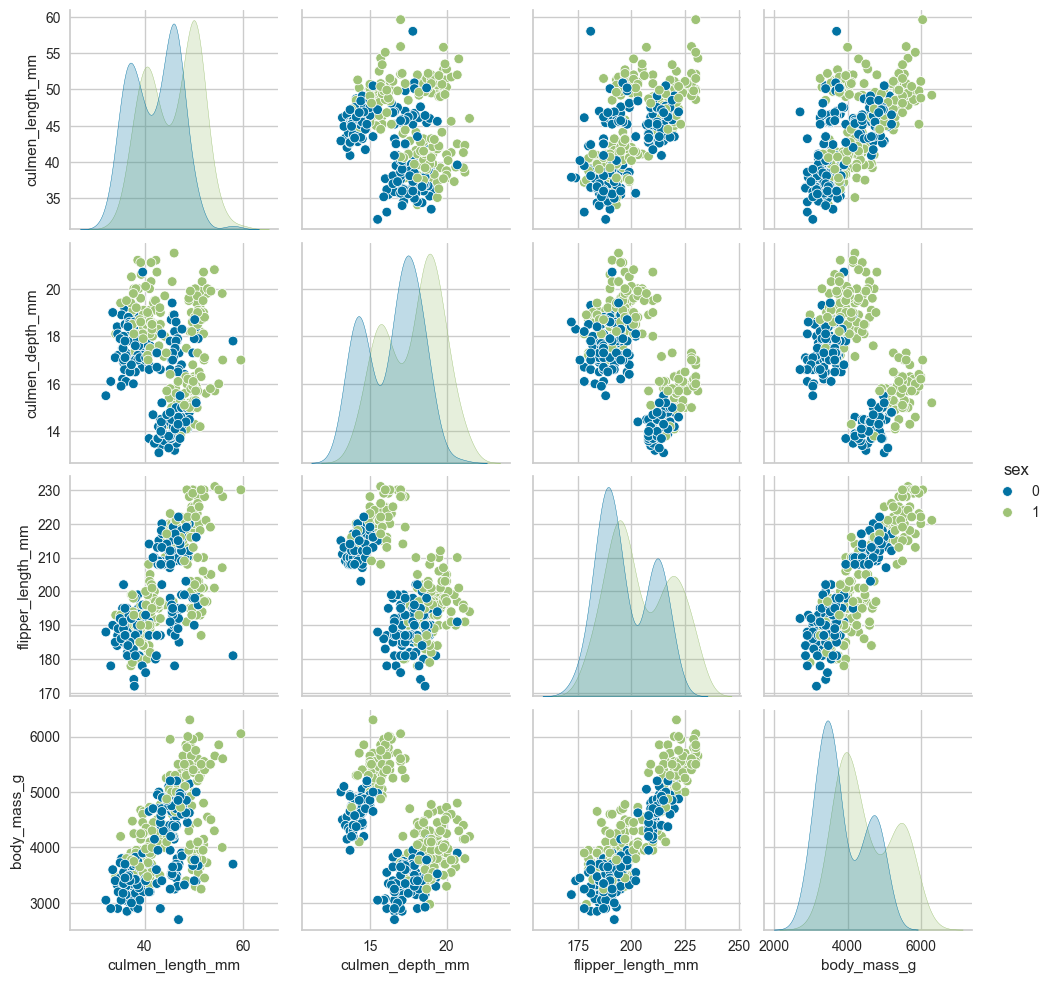

In [959]:
df = df[(df['flipper_length_mm'] > 0) & (df['flipper_length_mm'] < 2000)]
plt.figure()
sns.pairplot(df, hue= "sex")

Text(0.5, 1.0, 'Correlation map')

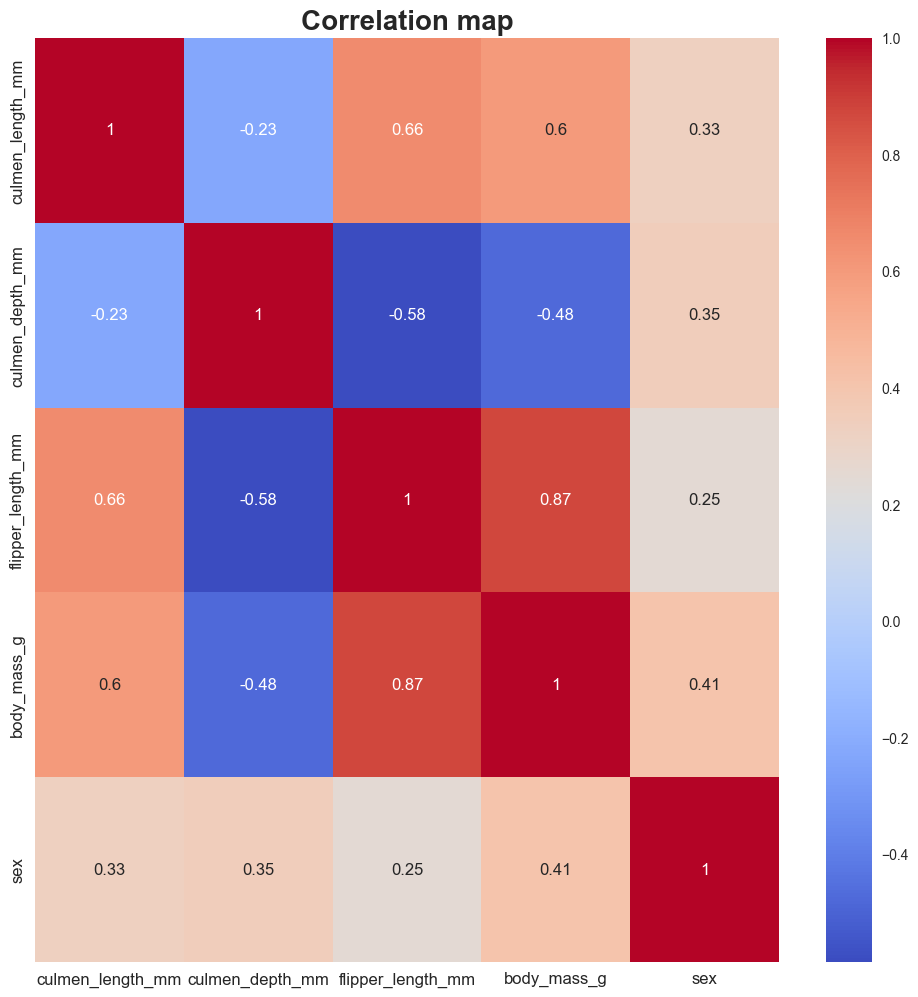

In [1032]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### We can see a moderate correlation between the flipper length and the culmen length of the penguin, and also between the body mass and the culmen length. On the other hand, there is a moderate negative correlation between the flipper length and the culmen depth of the penguin.

## Clustering

#### We will start by scaling the dataset:

In [961]:
non_scaled_df = df.copy()      # Let's make a copy of the original dataset so we can compare the clusters with the original features later

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)
new_df = pd.DataFrame(data = X, columns = df.columns)
new_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.893250,0.802278,-1.421447,-0.562469,0.968246
1,-0.819654,0.137697,-1.065982,-0.500115,-1.032796
2,-0.672463,0.444427,-0.426144,-1.186005,-1.032796
3,-0.006067,0.010491,0.925663,0.000901,0.968246
4,-1.334824,1.109008,-0.568330,-0.936591,-1.032796


#### The next step consists in reducing the dimensions of the dataset. We will use PCA for this purpose, using 2 variables:

In [962]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(new_df)
df_pca = pd.DataFrame(pca.transform(new_df), columns = (['col1', 'col2']))
df_pca.head()

,col1,col2
0,-1.585415,1.174472
1,-1.528887,-0.743477
2,-1.583491,-0.611425
3,0.727590,0.634349
4,-2.056462,-0.273912


Text(0, 0.5, 'PCA2 (col2)')

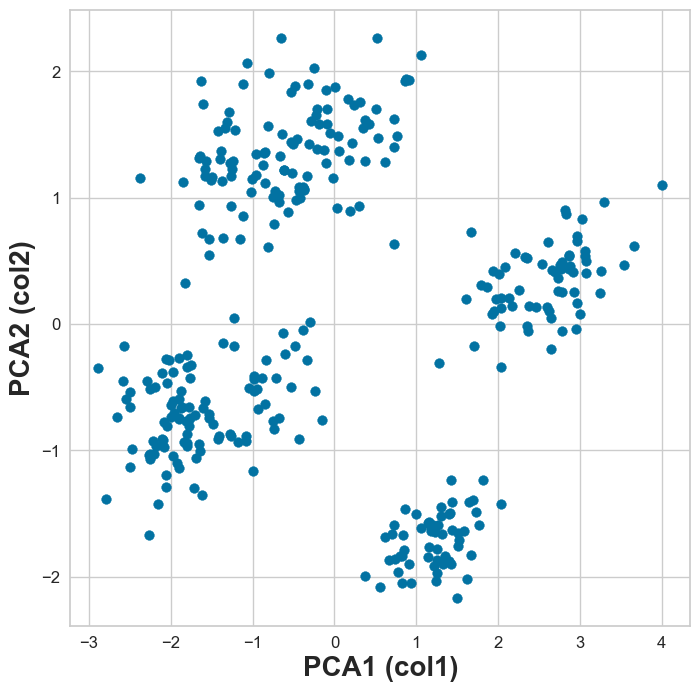

In [1043]:
plt.figure(figsize = (8, 8))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(df_pca['col1'], df_pca['col2'])
plt.xlabel('PCA1 (col1)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('PCA2 (col2)', fontsize = 20, fontweight='bold', **csfont)

#### Next, we will apply the elbow method to obtain the optimal number of clusters:

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

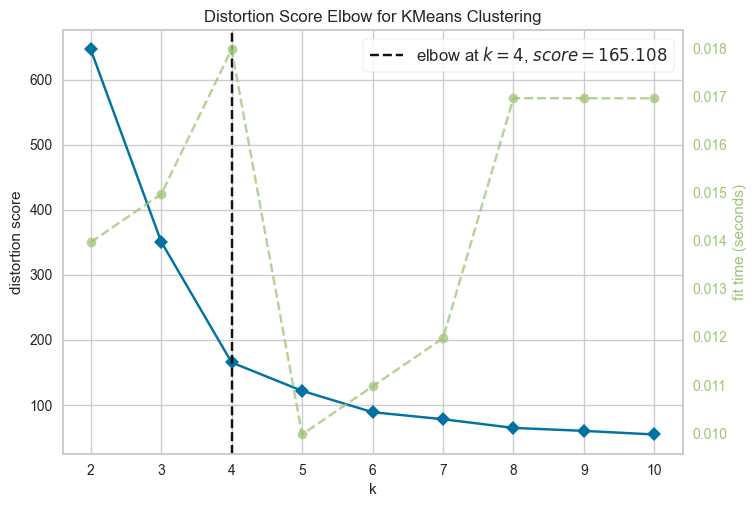

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [964]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

#### Now that we know that the optimal number of clusters is 4, we can perform the clustering process:

In [965]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4)
y_pred = ac.fit_predict(df_pca)
df_pca['Clusters'] = y_pred
non_scaled_df['Clusters'] = y_pred
df_pca.head()

,col1,col2,Clusters
0,-1.585415,1.174472,0
1,-1.528887,-0.743477,2
2,-1.583491,-0.611425,2
3,0.727590,0.634349,0
4,-2.056462,-0.273912,2


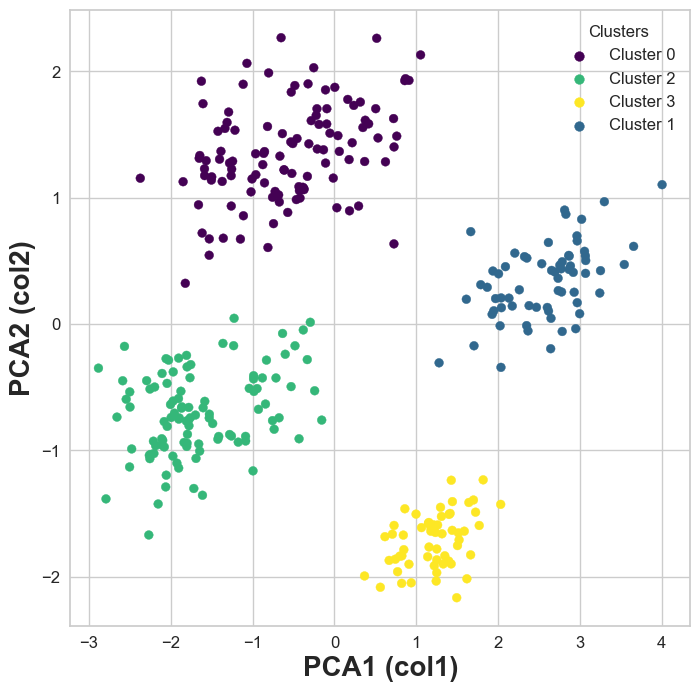

In [1049]:
plt.figure(figsize = (8, 8))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(df_pca['col1'], df_pca['col2'], s = 40, c = df_pca['Clusters'], cmap = 'viridis')
plt.xlabel('PCA1 (col1)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('PCA2 (col2)', fontsize = 20, fontweight='bold', **csfont)
unique_clusters = df_pca['Clusters'].unique()

for cluster in unique_clusters:
    plt.scatter([], [], color=plt.cm.viridis(cluster / df_pca['Clusters'].max()), label=f'Cluster {cluster}')

plt.legend(title='Clusters', fontsize=12)

## Evaluation

#### Now that we have our clusters, we can evaluate the different relations with the original columns. But first, let's see if the clusters are fairly distributed:

Text(0.5, 1.0, 'Cluster distribution')

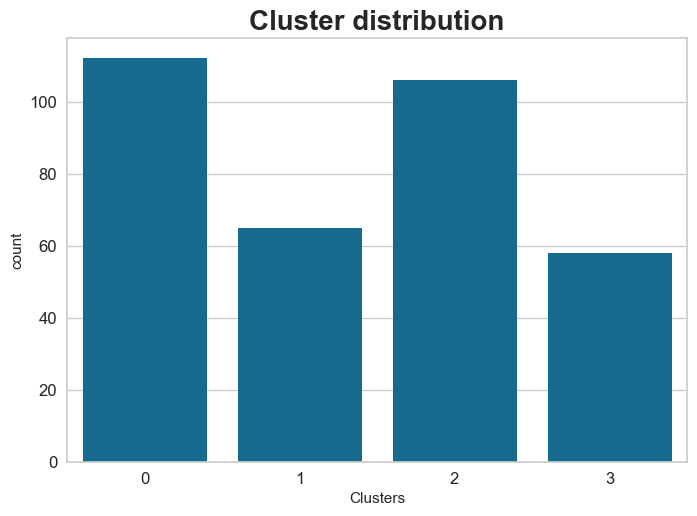

In [1060]:
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
pl = sns.countplot(x = non_scaled_df['Clusters'])
pl.set_title('Cluster distribution', fontsize = 20, fontweight='bold', **csfont)

#### We can see that the data is fairly distributed in the different clusters. Next, let's start by analysing how the sex affects the columns:

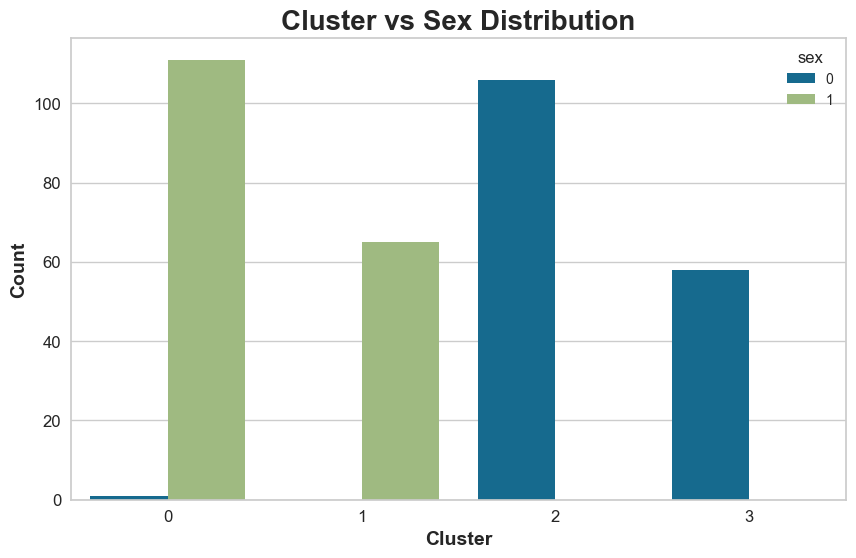

In [1062]:
plt.figure(figsize=(10, 6))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
sns.countplot(x='Clusters', hue='sex', data=non_scaled_df)
plt.title('Cluster vs Sex Distribution', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Cluster', fontsize = 14, fontweight='bold', **csfont)
plt.ylabel('Count', fontsize = 14, fontweight='bold', **csfont)
plt.show()

#### It can be observed how the majority of the components of the clusters 0 and 1 are females, whilst the components of the 2 and 3 are males. Now, let's perform several boxplots to analyse the different parameters of the dataset and how are thye related with the clusters:

Text(0, 0.5, 'Culmen Length')

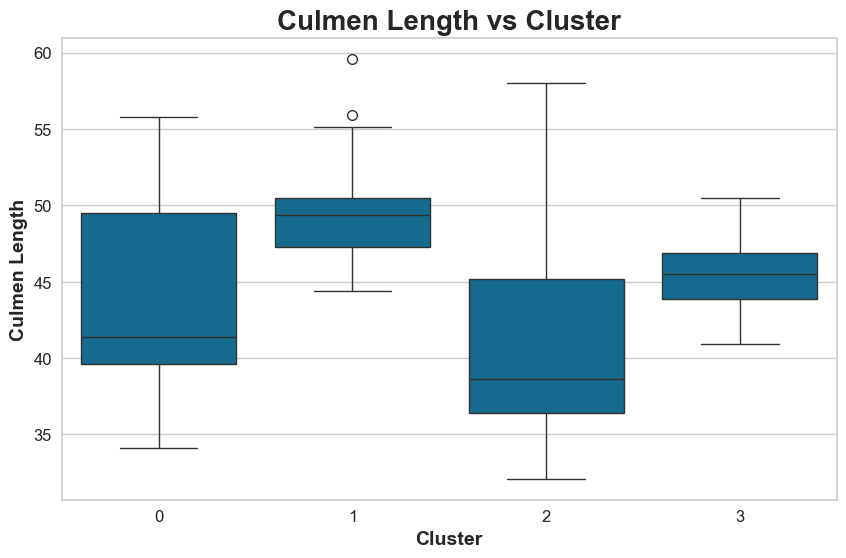

In [1067]:
plt.figure(figsize=(10, 6))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
sns.boxplot(x='Clusters', y='culmen_length_mm', data=non_scaled_df)
plt.title('Culmen Length vs Cluster', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Cluster', fontsize = 14, fontweight='bold', **csfont)
plt.ylabel('Culmen Length', fontsize = 14, fontweight='bold', **csfont)

#### From the boxplot, we can see that in the cluster 0 the median culmen length is around 43 mm. Moreover, the boxplot is relatively wide, suggesting a wider range of culmen lengths within this cluster. In the cluster 1, the median is around 49 mm, indicating a longer culmen length compared to cluster 0. Meanwhile, the box is narrower, suggesting a smaller range of values. There are two outliers with culmen lengths greater than the upper whisker. In the cluster 2 the median is around 40 mm, the lowest among the four clusters. The box is wide, similar to cluster 0, implying a broad range of culmen lengths. Finally, in cluster 3 the median is around 46 mm, falling between clusters 1 and 2. The box is relatively narrow, indicating smaller range of values. Having in mind our previous result, we know that the clusters 0 and 1 are formed by males, and by the result of the boxplot, in the cluster 0 we have a large number of penguins with different culmen lengths, but a smaller group with greater culmen lengths. The same happens with clusters 2 and 3 (the females), but with culmen lengths lower than the ones in males.

Text(0, 0.5, 'Culmen Depth')

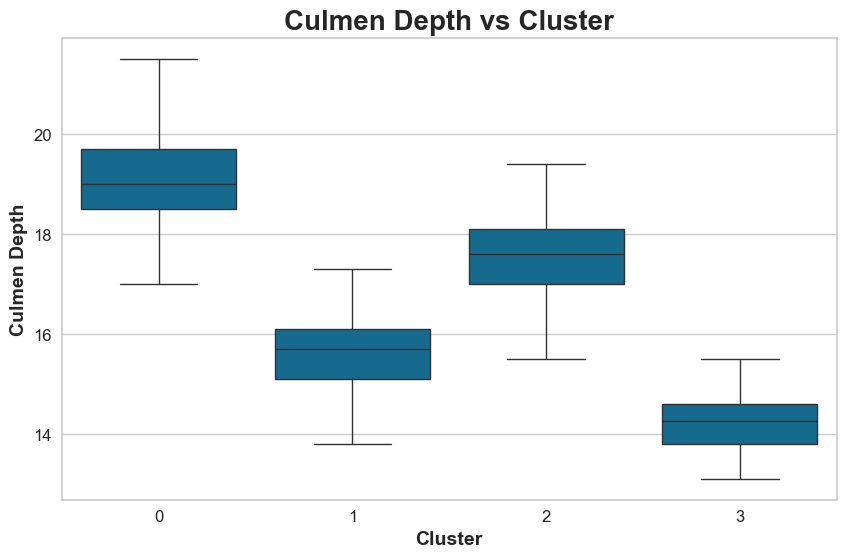

In [1073]:
plt.figure(figsize=(10, 6))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
sns.boxplot(x='Clusters', y='culmen_depth_mm', data=non_scaled_df)
plt.title('Culmen Depth vs Cluster', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Cluster', fontsize = 14, fontweight='bold', **csfont)
plt.ylabel('Culmen Depth', fontsize = 14, fontweight='bold', **csfont)

#### Something similar happens with the culmen depth of the penguins. Clusters 0 and 1 (the males) present higher values than the ones in clusters 2 and 3 (the females). We can see that cluster 0 (higher number of male penguins) presents now a narrow distribution in culmen depth, whilst the cluster 1, which had higher culmen lengths presents smaller culmen depths. The same happens with clusters 2 and 3 for the female counterpart.

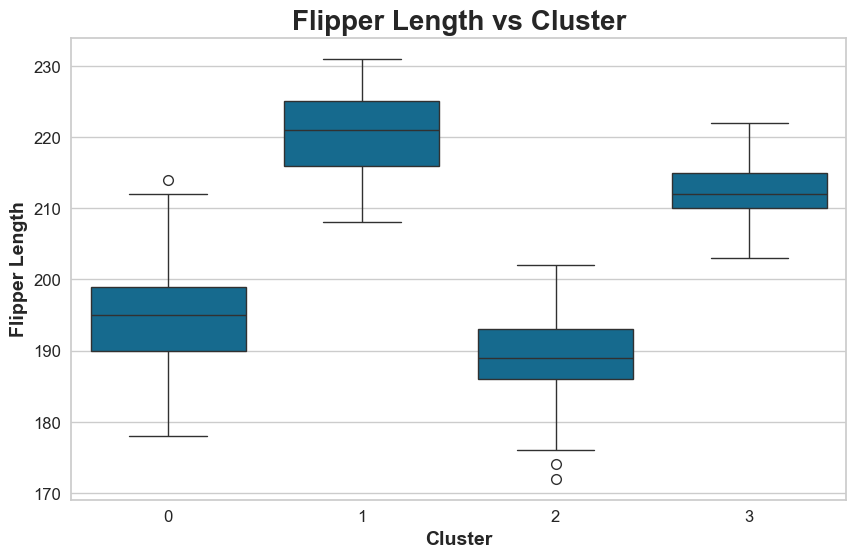

In [1075]:
plt.figure(figsize=(10, 6))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
sns.boxplot(x='Clusters', y='flipper_length_mm', data=non_scaled_df)
plt.title('Flipper Length vs Cluster', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Cluster', fontsize = 14, fontweight='bold', **csfont)
plt.ylabel('Flipper Length', fontsize = 14, fontweight='bold', **csfont)
plt.show()

#### Analysing the flipper length, we can see that clusters 0 and 2 present similar characteristics (with cluster 2 slightly smaller). On the other hand, the cluster 1 presents the highest value, followed by cluster 3.

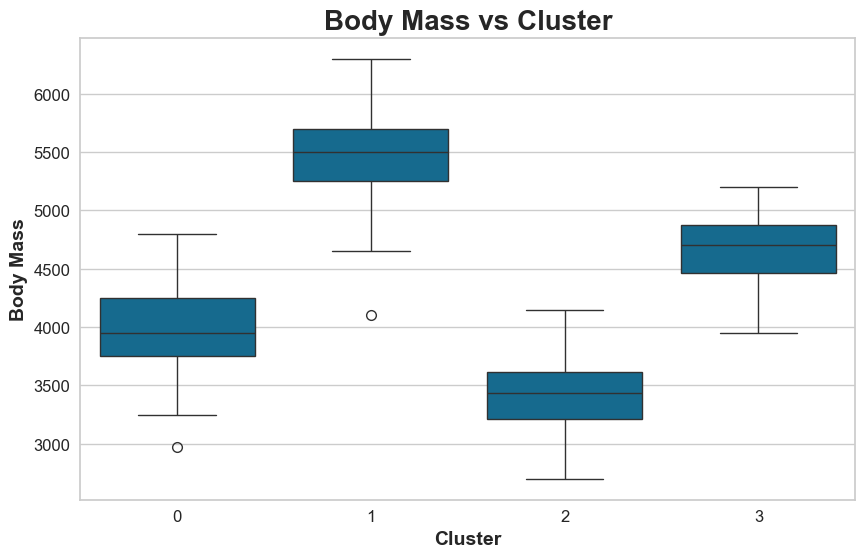

In [1078]:
plt.figure(figsize=(10, 6))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
sns.boxplot(x='Clusters', y='body_mass_g', data=non_scaled_df)
plt.title('Body Mass vs Cluster', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Cluster', fontsize = 14, fontweight='bold', **csfont)
plt.ylabel('Body Mass', fontsize = 14, fontweight='bold', **csfont)
plt.show()

#### We can observe how the females (2 and 3) present smaller body weighs, whilst the males (0 and 1) present higher ones. With this information we can conclude that:

#### - Cluster 0 --> Male penguins with high culmen lengths, the highest culmen depths, high flipper lengths and high body masses.
#### - Cluster 1 --> Male penguins with the highest culmen lengths, high culmen depths, the higher flipper lengths and the higher body masses.
#### - Cluster 2 --> Female penguins with high culmen lengths, the highest culmen depths, high flipper lengths and high body masses.
#### - Cluster 3 --> Female penguins with the highest culmen lengths, high culmen depths, the higher flipper lengths and the higher body masses.

#### We can do a pairplot to observe the distribution of these clusters knowing that information:

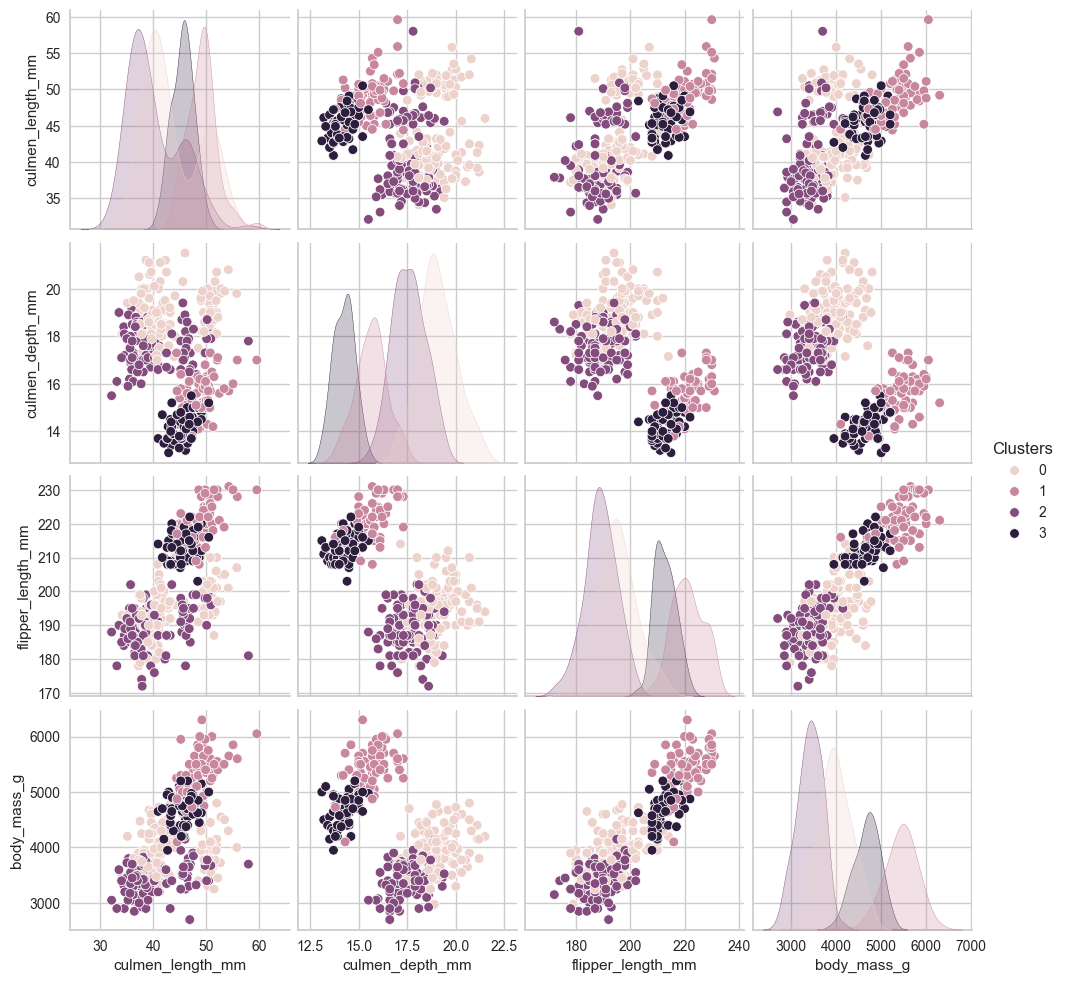

In [1082]:
# Pairplot with clusters
sns.pairplot(non_scaled_df, hue='Clusters', vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])